## Line detection by color segmentation

In [2]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
import matplotlib.pyplot as plt
from matplotlib import colors
from common.functions import *
import numpy as np
import cv2

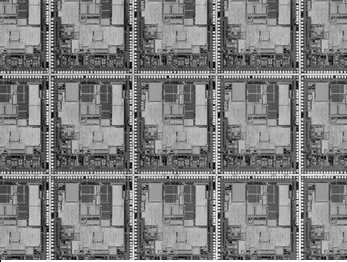

In [3]:
die_img = cv2.imread('dies_or.png')
die_gray = cv2.cvtColor(die_img, cv2.COLOR_BGR2GRAY)

h, w = die_gray.shape[:2]
displayImage_fromcv2(die_gray, w, h)

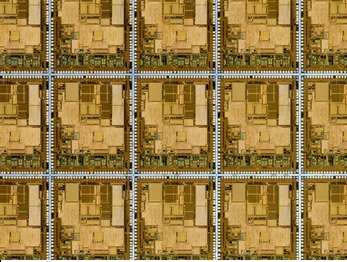

In [4]:
die_rgb = cv2.cvtColor(die_img, cv2.COLOR_BGR2RGB)
h, w = die_rgb.shape[:2]
displayImage_fromcv2(die_rgb, w, h)

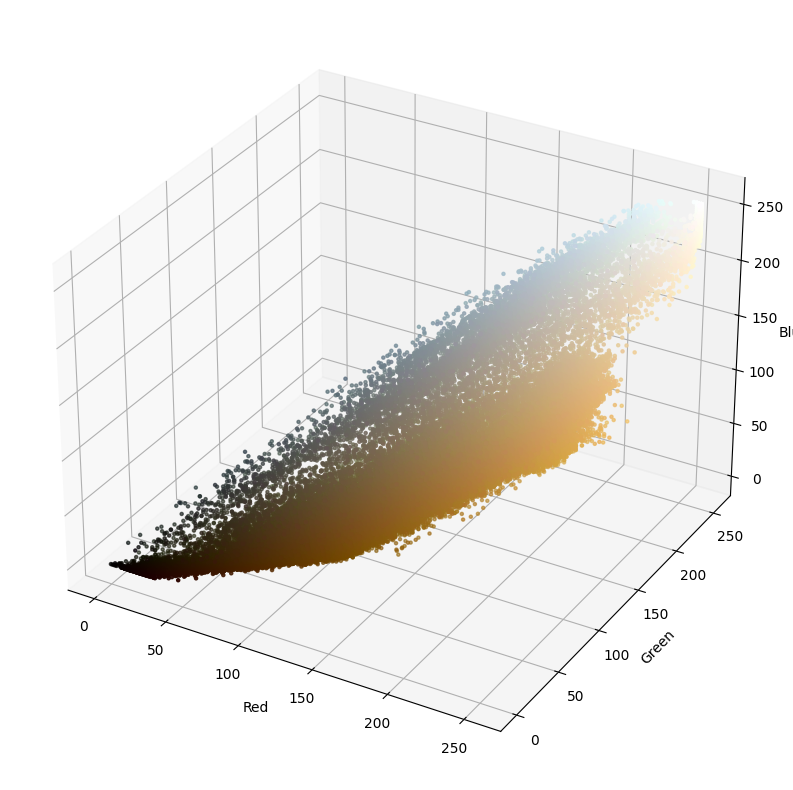

In [5]:
# Splitting components of image
r, g, b = cv2.split(die_rgb)

# Creating Figure for 3D plot
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1, projection='3d')

# Normalising list of pixels
pixel_colors = die_rgb.reshape((np.shape(die_rgb)[0] * np.shape(die_rgb)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# Plotting
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [6]:
# Thresholds for segmenting Die
light_orange = (0, 200, 1)
dark_orange = (255, 255, 255)

In [7]:
# Segmenting Die according to thresholds, using a mask
mask = cv2.inRange(die_rgb, light_orange, dark_orange)
segmented_die = cv2.bitwise_and(die_img, die_img, mask=mask)

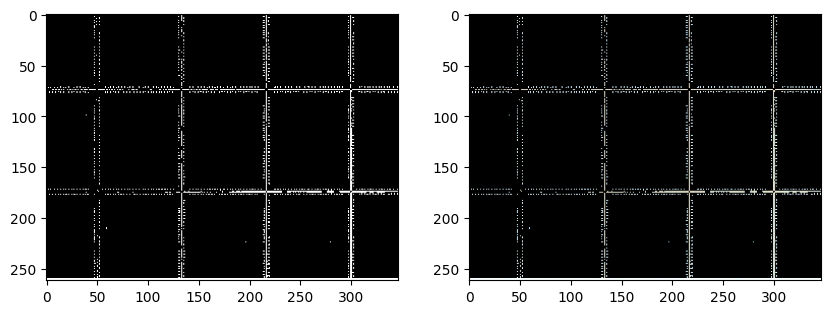

In [8]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(segmented_die)
plt.show()

## Line detection by Hough Transform

In [9]:
img = cv2.imread('dies_or.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(gray, (5,5), 10)
edges = cv2.Canny(img_blur,50,150,apertureSize = 3)
 
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
 
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
 
# cv2.imwrite('houghlines1.jpg',img)

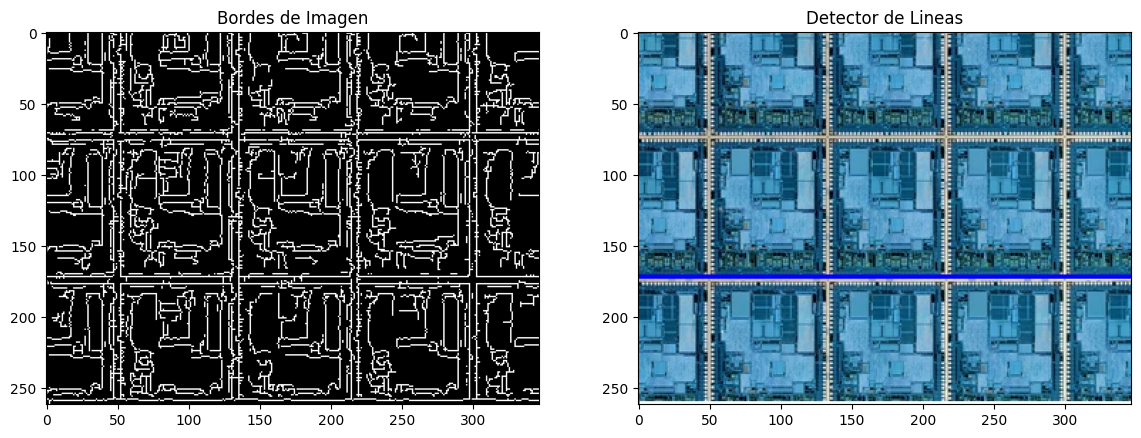

In [11]:
images = {'Bordes de Imagen':edges,
          'Detector de Lineas':img
        }

compare(images)